In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("train_dataset.csv")

In [3]:
df.head().style.background_gradient(cmap="summer")

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.000000,0.900000,0.900000,1,1,118,78,97,239,153,70,142,19.800000,1,1.000000,61,115,125,1,1
1,20,175,110,110.000000,0.700000,0.900000,1,1,119,79,88,211,128,71,114,15.900000,1,1.100000,19,25,30,1,0
2,45,155,65,86.000000,0.900000,0.900000,1,1,110,80,80,193,120,57,112,13.700000,3,0.600000,1090,1400,276,0,0
3,45,165,80,94.000000,0.800000,0.700000,1,1,158,88,249,210,366,46,91,16.900000,1,0.900000,32,36,36,0,0
4,20,165,60,81.000000,1.500000,0.100000,1,1,109,64,100,179,200,47,92,14.900000,1,1.200000,26,28,15,0,0


In [ ]:
df.isna().sum() # checking for any missing values

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [4]:
df1 = df.copy()
print("rows in dataset: ",df1.shape[0])
print("duplicate rows: ",df1.duplicated().sum())
df1 = df1.drop_duplicates()
print("rows after dropping duplicates in  dataset: ",df1.shape[0])

rows in dataset:  38984
duplicate rows:  5517
rows after dropping duplicates in  dataset:  33467


<Axes: xlabel='Urine protein', ylabel='count'>

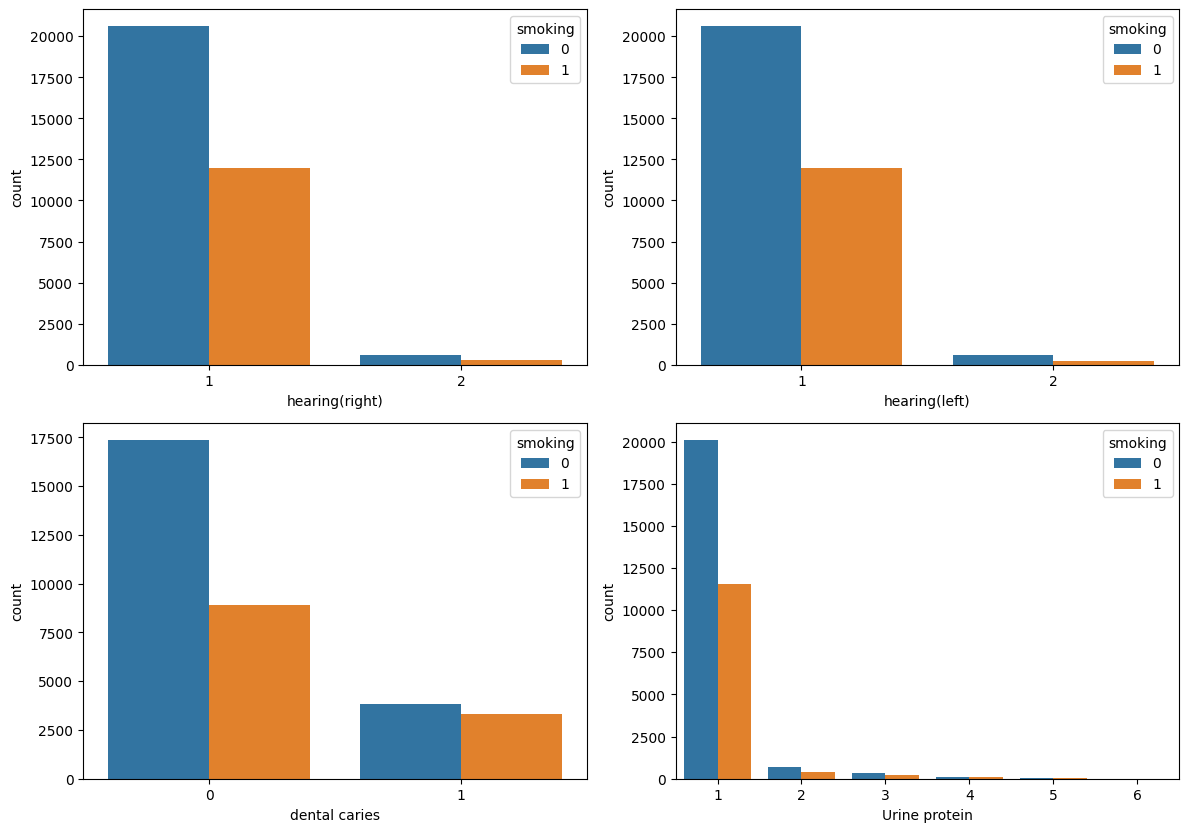

In [5]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df1,x="hearing(right)",hue='smoking')

plt.subplot(2,2,2)
sns.countplot(data=df1,x="hearing(left)",hue='smoking')
plt.tight_layout(pad=1.1)

plt.subplot(2,2,3)
sns.countplot(data=df1,x="dental caries",hue='smoking')

plt.subplot(2,2,4)
sns.countplot(data=df1,x="Urine protein",hue='smoking')

In [6]:
# calculating chi square to understand the relationship between the categorical variables and the target variable
chi = ['hearing(left)','hearing(right)','dental caries','Urine protein']

for i in range(len(chi)):
    # print(chi[i])
    print('contingency table for '+chi[i]+ " and smoking")
    cross = pd.crosstab(df1[str(chi[i])],df1['smoking'])
    print(cross)
    chi2, p, dof, ex = stats.chi2_contingency(cross)
    print("")
    print('results of chi-Square test for '+chi[i]+ " and smoking")
    print("("+str(chi2)+", "+str(p)+", "+str(dof)+")")
    print("++++++++++++++++++++++++++++++++++++++++++++")

contingency table for hearing(left) and smoking
smoking            0      1
hearing(left)              
1              20612  12006
2                597    252

results of chi-Square test for hearing(left) and smoking
(17.796185766032348, 2.4587565024720927e-05, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for hearing(right) and smoking
smoking             0      1
hearing(right)              
1               20610  11985
2                 599    273

results of chi-Square test for hearing(right) and smoking
(10.681971148699716, 0.0010818472188142405, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for dental caries and smoking
smoking            0     1
dental caries             
0              17360  8922
1               3849  3336

results of chi-Square test for dental caries and smoking
(378.24617641567613, 2.997771257507368e-84, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for Urine protein and smoking
smoking            

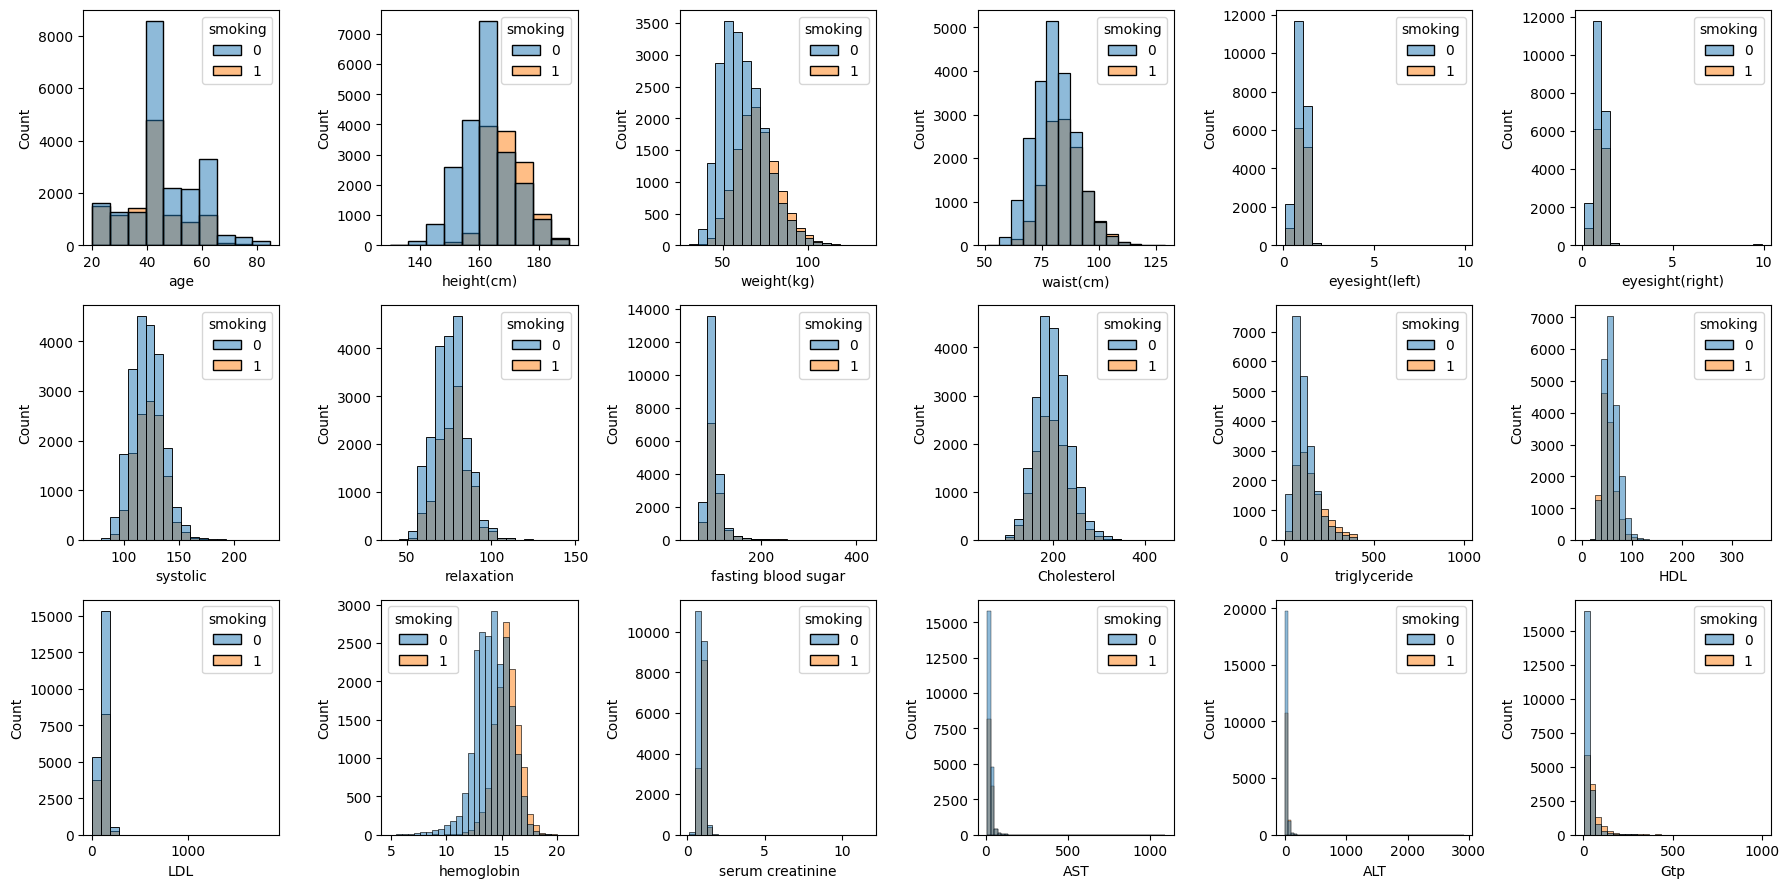

In [7]:
plt.figure(figsize=(18,9))
# plt.tight_layout(pad=1.1)

plt.subplot(3,6,1)
sns.histplot(data=df1, x="age", bins=10,hue='smoking')

plt.subplot(3,6,2)
sns.histplot(data=df1, x="height(cm)", bins=10,hue='smoking')

plt.subplot(3,6,3)
sns.histplot(data=df1, x="weight(kg)", bins=20,hue='smoking')

plt.subplot(3,6,4)
sns.histplot(data=df1, x="waist(cm)", bins=15,hue='smoking')

plt.subplot(3,6,5)
sns.histplot(data=df1, x="eyesight(left)", bins=20,hue='smoking')

plt.subplot(3,6,6)
sns.histplot(data=df1, x="eyesight(right)", bins=20,hue='smoking')

plt.subplot(3,6,7)
sns.histplot(data=df1, x="systolic", bins=20,hue='smoking')

plt.subplot(3,6,8)
sns.histplot(data=df1, x="relaxation", bins=20,hue='smoking')

plt.subplot(3,6,9)
sns.histplot(data=df1, x="fasting blood sugar", bins=20,hue='smoking')

plt.subplot(3,6,10)
sns.histplot(data=df1, x="Cholesterol", bins=20,hue='smoking')

plt.subplot(3,6,11)
sns.histplot(data=df1, x="triglyceride", bins=25,hue='smoking')

plt.subplot(3,6,12)
sns.histplot(data=df1, x="HDL", bins=30,hue='smoking')

plt.subplot(3,6,13)
sns.histplot(data=df1, x="LDL", bins=20,hue='smoking')

plt.subplot(3,6,14)
sns.histplot(data=df1, x="hemoglobin", bins=30,hue='smoking')

plt.subplot(3,6,15)
sns.histplot(data=df1, x="serum creatinine", bins=30,hue='smoking')

plt.subplot(3,6,16)
sns.histplot(data=df1, x="AST", bins=50,hue='smoking')

plt.subplot(3,6,17)
sns.histplot(data=df1, x="ALT", bins=60,hue='smoking')

plt.subplot(3,6,18)
sns.histplot(data=df1, x="Gtp", bins=30,hue='smoking')

plt.tight_layout(pad=1.1)

<Axes: xlabel='weight(kg)', ylabel='Count'>

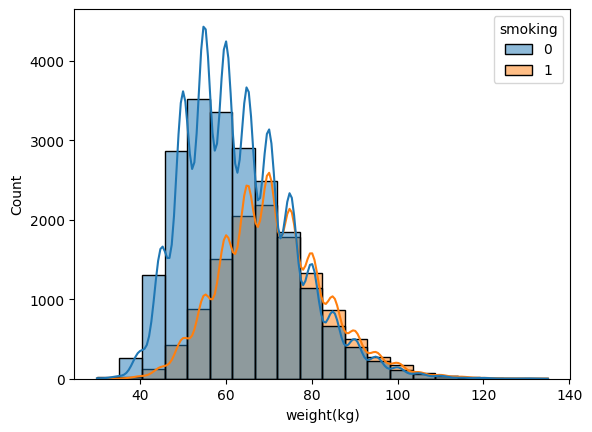

In [ ]:
sns.histplot(data=df1, x="weight(kg)", bins=20,hue='smoking',kde=True)

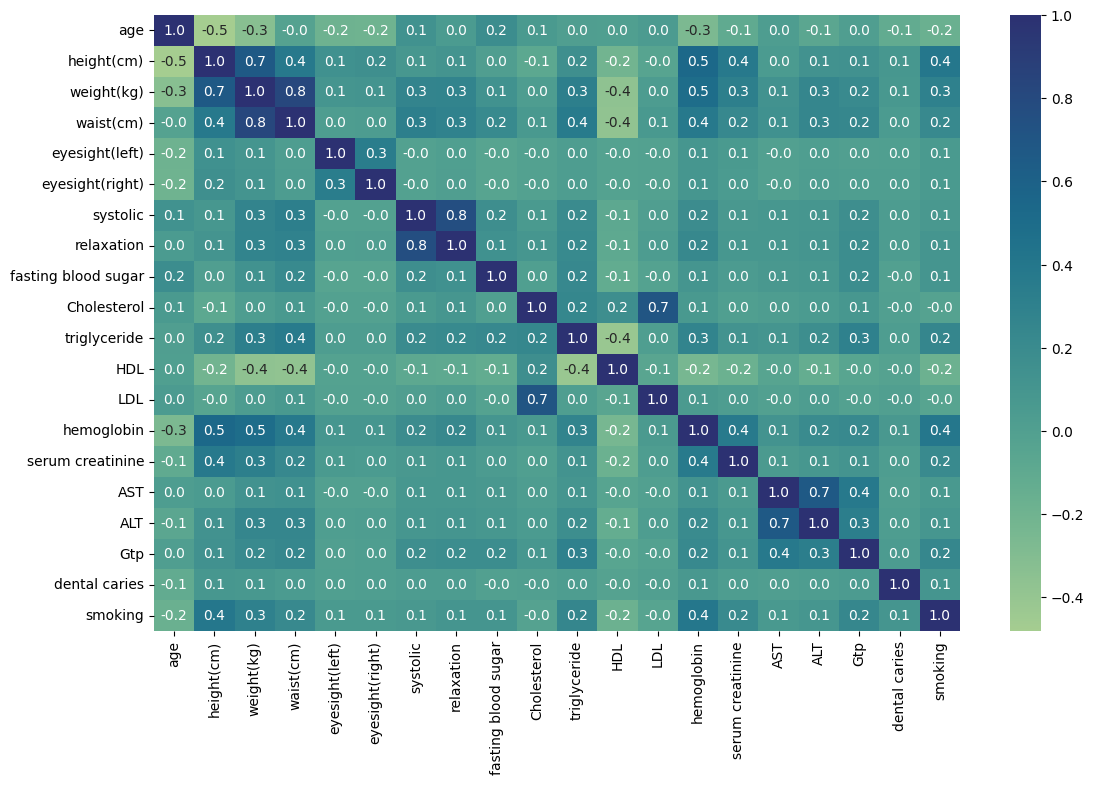

In [8]:
df2 = df1[["age","height(cm)","weight(kg)","waist(cm)","eyesight(left)","eyesight(right)","systolic","relaxation","fasting blood sugar","Cholesterol","triglyceride","HDL","LDL","hemoglobin","serum creatinine","AST","ALT","Gtp","dental caries","smoking"]]

corr = df2.corr()

plt.figure(figsize=(13,8))
s = sns.heatmap(corr, annot=True, fmt=".1f",cmap="crest")

In [9]:
df1.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,...,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000
mean,44.153943,164.684465,65.930319,82.081501,1.013849,1.009553,1.025368,1.026056,121.498730,76.017599,...,57.257537,115.182090,14.624463,1.086533,0.886467,26.195536,27.139929,39.952401,0.214689,0.366271
std,12.071768,9.195867,12.877955,9.310533,0.496245,0.497867,0.157243,0.159303,13.671019,9.672070,...,14.598021,43.159159,1.562414,0.403008,0.222038,18.760580,31.613159,49.965736,0.410613,0.481792
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
df2 = df1.loc[:, df1.columns != 'Urine protein']

list(df2.columns)

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

In [12]:
x = df2.drop('smoking',axis = 1)
y = df2['smoking']

x_training, x_test, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3,random_state=42)


scaler = StandardScaler()
scaler.fit(x_training)
x_training_data = scaler.transform(x_training)
x_test_data = scaler.transform(x_test)

print(x_training_data.shape)
print(x_test_data.shape)

(23426, 21)
(10041, 21)


In [73]:
print(x_training_data.shape)
print(x_test_data.shape)
from sklearn.metrics import ConfusionMatrixDisplay
results=[]

(23426, 21)
(10041, 21)


In [96]:


# results=[]
def score(y_test_data,predict,model):
  # from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
  cm = confusion_matrix(y_test_data, predict)
  precision, recall, f1_score, cutoff_threshold = classification_report(y_test_data, predict, output_dict=True)['1'].values()
  acc = accuracy_score(y_test_data, predict)

  Specificity = cm[0,0]/(cm[0,0]+cm[0,1])
  Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])

  list1 = [model,acc,Sensitivity,Specificity,f1_score]
  results.append(list1)

  cmdis = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

  print("Accuracy is",acc)
  print("Sensitivity is",Sensitivity)
  print("Specificity is",Specificity)
  print("F1 score is",f1_score)

  return cmdis



In [51]:


error_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_training_data,y_training_data)
    predict = knn.predict(x_test_data)
    error_rate.append(np.mean(predict != y_test_data))

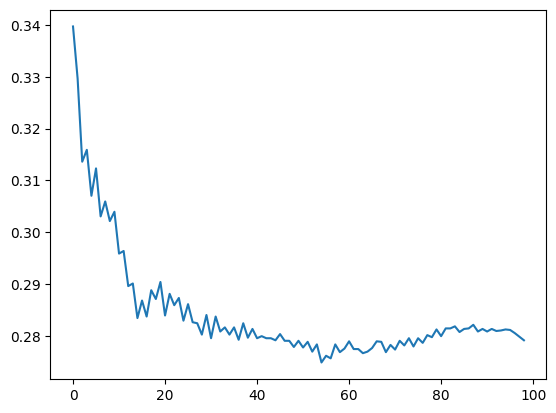

In [52]:
plt.plot(error_rate)

In [65]:
knn = KNeighborsClassifier(n_neighbors=55)

knn.fit(x_training_data,y_training_data)

predict = knn.predict(x_test_data)

print(classification_report(y_test_data,predict))
precision, recall, f1_score, cutoff_threshold = classification_report(y_test_data, predict, output_dict=True)['1'].values()

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6344
           1       0.64      0.58      0.61      3697

    accuracy                           0.73     10041
   macro avg       0.70      0.69      0.70     10041
weighted avg       0.72      0.73      0.72     10041



In [75]:
score = score(y_test_data,predict,"KNN")

Accuracy is 0.7251269793845234
Sensitivity is 0.5777657560183933
Specificity is 0.8110025220680959
F1 score is 0.6075085324232081


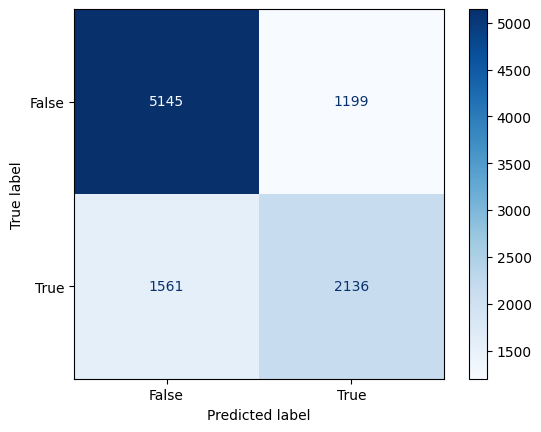

In [67]:
score.plot(cmap=plt.cm.Blues)
plt.show()

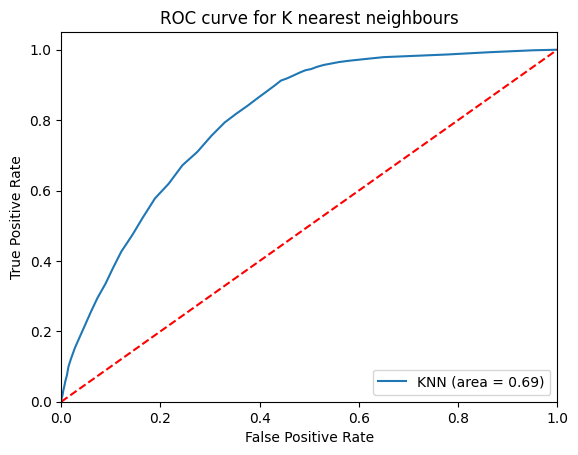

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_data, predict)
fpr, tpr, thresholds = roc_curve(y_test_data, knn.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for K nearest neighbours')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [69]:


mod = LogisticRegression()
param_grid = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
grid_search = GridSearchCV(mod, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_training_data,y_training_data)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'solver': 'newton-cg'}
Best score:  0.7228722172952334


In [70]:


logreg = LogisticRegression(solver='newton-cg')
logreg.fit(x_training_data,y_training_data)

log_pred = logreg.predict(x_test_data)

print(classification_report(y_test_data,log_pred))
precision, recall, f1_score, cutoff_threshold = classification_report(y_test_data, log_pred, output_dict=True)['1'].values()

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      6344
           1       0.63      0.56      0.59      3697

    accuracy                           0.72     10041
   macro avg       0.69      0.68      0.69     10041
weighted avg       0.71      0.72      0.71     10041



In [78]:
# from sklearn.metrics import ConfusionMatrixDisplay
score = score(y_test_data,log_pred,"Logistic Regression")

Accuracy is 0.716960462105368
Sensitivity is 0.5566675682986205
Specificity is 0.8103720050441362
F1 score is 0.5915492957746479


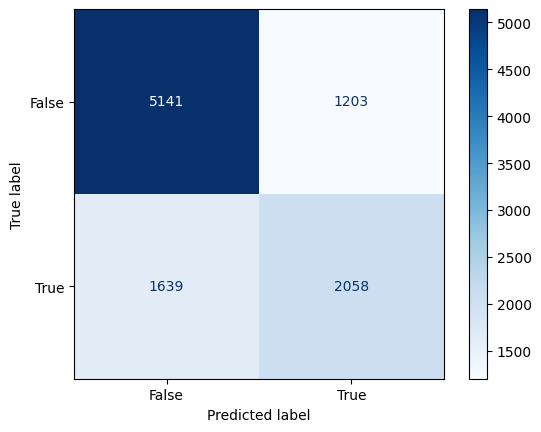

In [79]:
score.plot(cmap=plt.cm.Blues)
plt.show()

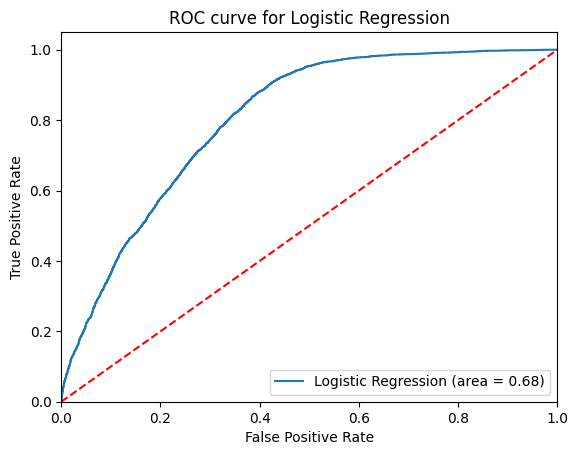

In [80]:

logit_roc_auc = roc_auc_score(y_test_data, log_pred)
fpr, tpr, thresholds = roc_curve(y_test_data, logreg.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [45]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 3, 10]}

model = DecisionTreeClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_training_data,y_training_data)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}
Best score:  0.7224448856718462


In [81]:


dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=2)

dtc.fit(x_training_data,y_training_data)

dtc_pred = dtc.predict(x_test_data)

print(classification_report(y_test_data,dtc_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      6344
           1       0.60      0.72      0.66      3697

    accuracy                           0.72     10041
   macro avg       0.71      0.72      0.71     10041
weighted avg       0.74      0.72      0.73     10041



In [84]:
score = score(y_test_data,dtc_pred,"Decision Tree Classifier")

Accuracy is 0.7235335125983468
Sensitivity is 0.7227481741952935
Specificity is 0.7239911727616646
F1 score is 0.658128078817734


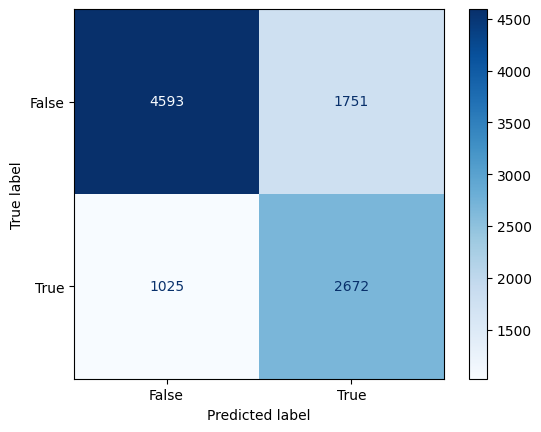

In [85]:
score.plot(cmap=plt.cm.Blues)
plt.show()

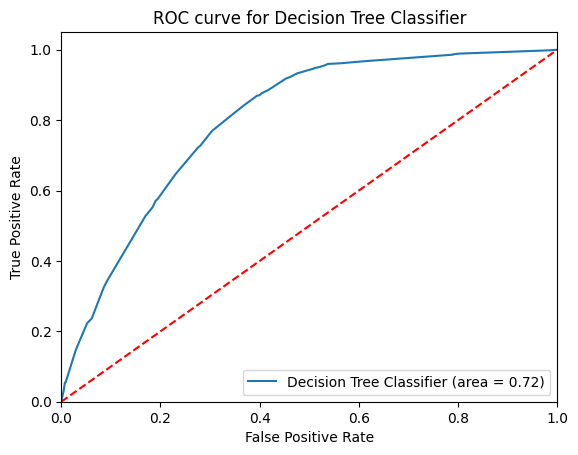

In [86]:

logit_roc_auc = roc_auc_score(y_test_data, dtc_pred)
fpr, tpr, thresholds = roc_curve(y_test_data, dtc.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [48]:
model = RandomForestClassifier()

param_grid = {'n_estimators': [50, 100, 150, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_training_data,y_training_data)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}
Best score:  0.748911460418668


In [87]:


rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 150)
rfc.fit(x_training_data,y_training_data)

rfc_pred = rfc.predict(x_test_data)
print(classification_report(y_test_data,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      6344
           1       0.65      0.64      0.65      3697

    accuracy                           0.74     10041
   macro avg       0.72      0.72      0.72     10041
weighted avg       0.74      0.74      0.74     10041



In [90]:
score = score(y_test_data,rfc_pred,'Random Forest Classifier')

Accuracy is 0.7401653221790658
Sensitivity is 0.6434947254530701
Specificity is 0.7965006305170239
F1 score is 0.6458531288177005


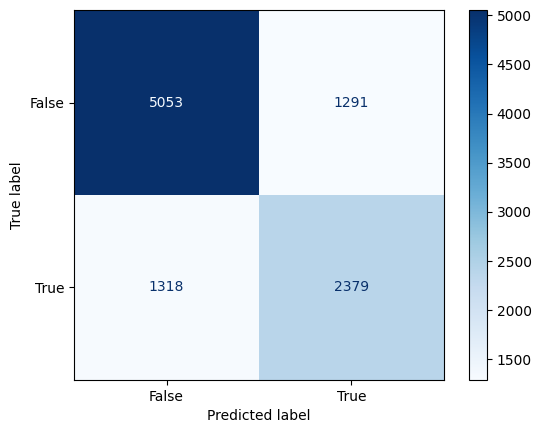

In [92]:
score.plot(cmap=plt.cm.Blues)
plt.show()

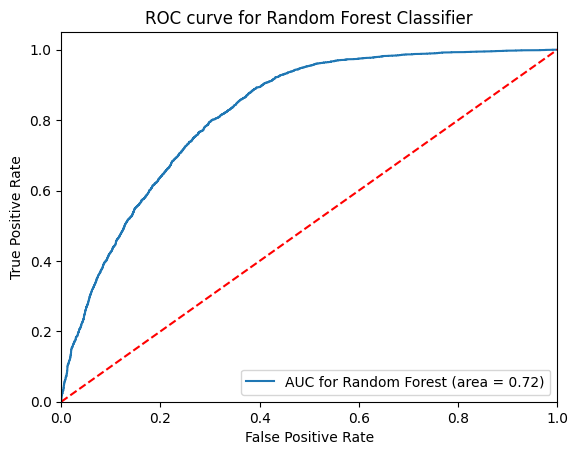

In [93]:

logit_roc_auc = roc_auc_score(y_test_data, rfc_pred)
fpr, tpr, thresholds = roc_curve(y_test_data, rfc.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC for Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [97]:
svm = SVC(kernel = 'rbf', probability=True)

svm.fit(x_training_data,y_training_data)

svm_pred = svm.predict(x_test_data)
print(classification_report(y_test_data,svm_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6344
           1       0.66      0.62      0.64      3697

    accuracy                           0.74     10041
   macro avg       0.72      0.72      0.72     10041
weighted avg       0.74      0.74      0.74     10041



In [98]:
score = score(y_test_data,svm_pred,'Support Vector Machine')

Accuracy is 0.7418583806393786
Sensitivity is 0.6172572355964295
Specificity is 0.8144703656998739
F1 score is 0.6377864728898825


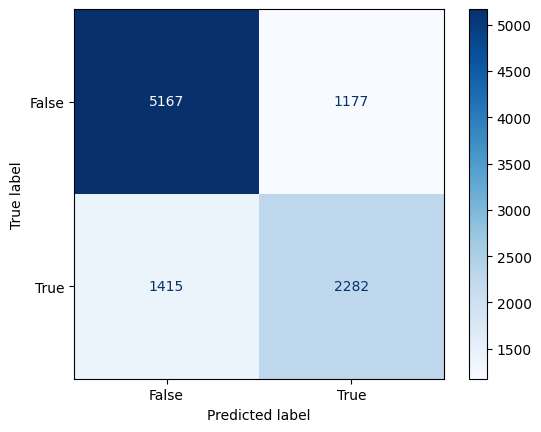

In [99]:
score.plot(cmap=plt.cm.Blues)
plt.show()

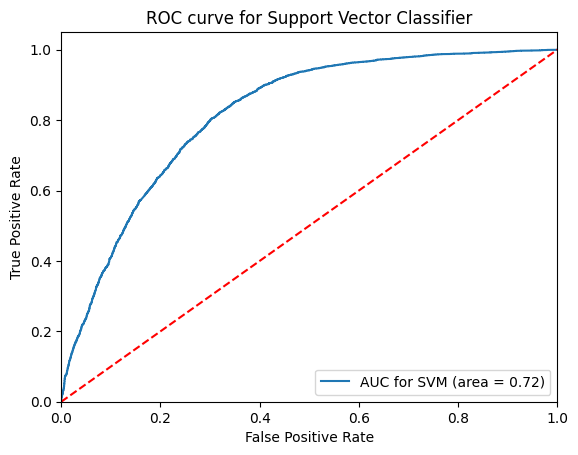

In [100]:

svm_roc_auc = roc_auc_score(y_test_data, svm_pred)
fpr, tpr, thresholds = roc_curve(y_test_data, svm.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC for SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Support Vector Classifier')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [121]:
results_df = pd.DataFrame(results,columns = ['model','Accuracy','Sensitivity','Specificity','F1 score'])

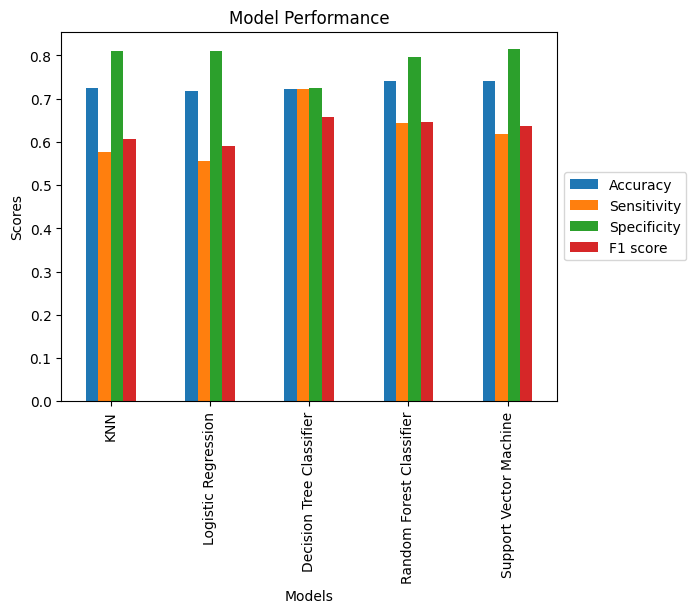

In [122]:
# set the model column as the index
results_df.set_index('model',inplace=True)

# plot the grouped bar chart
ax = results_df.plot(kind='bar')
plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels(results_df.index, rotation=90)
plt.show()
